# LOAN PREDICTION 

### This project use some basic imformation of a person like sallary, no of dependants , age, gender and on the bases of it it will try to predict the whether the loan application of the person would accept or not ?


#     

## 1. Importing libraries

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from statistics import median
from statistics import mode
from statistics import mean
from statistics import stdev

## 2. Importing Data

In [2]:
#import data 
data = pd.read_csv("train.csv")
data1 = pd.read_csv("test.csv")


## 3.Unserstanding The data 

In [3]:
print(data.head())

sz=data.shape


Z=data1.shape
print(sz)
print (Z)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From all the above outputs we can understand that the data have 13 features and 614 samples from which some of features are catagorials ie. gender , married or not , self employed or not etc... while some of them are non catagorial ie income ,loan amount etc



## 4. Preprocessing of the Data 

## 4.1 Replacing Missing Values in data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### from the above output we can see that the data have many missing values so wee need to clean all the missing values

In [6]:
#checking count of each catagories in gender column 
data['Gender'].value_counts()


Male      489
Female    112
Name: Gender, dtype: int64

#### as from the above information we can see most of  the values in our data are of male catagories so we can replace missing values with male

In [7]:
#relacing null values in gender column with male
data['Gender']=data['Gender'].fillna('Male')

In [8]:
#checking count of each catagories in Maried column 
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

#### as from the above information we can see most of  the values in our data are of  married catagories so we can replace missing values with Yes

In [9]:
#repalcing null values in Married column with yes
data['Married']=data['Married'].fillna('Yes')

In [10]:
#checking count of each catagories in Maried column 
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

#### as from the above information we can see most of  the values in our data are of 0 dependent catagories so we can replace missing values with 0

In [11]:
#repalcing null values in Married column with yes
data['Dependents']=data['Dependents'].fillna('0')

In [12]:
#checking count of each catagories in Maried column 
data['Self_Employed'].value_counts()
 

No     500
Yes     82
Name: Self_Employed, dtype: int64

#### As from the above observation we can see all most of the values are of not self employed catagories so we can replace all the missing values with not self employed

In [13]:
#repalcing null values in Married column with yes
data['Self_Employed']=data['Self_Employed'].fillna('No')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### As  we can see we have replaced all the missing values with Dtype = object .

#### Now we need to replace all the float type values.as they are of float type they can have a wide range of values so we cannot replace them with the help of frequency wise 

#### we will relalce all the values with mean/median of the variable 

/home/kapil/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kapil/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <a list of 10 Patch objects>)

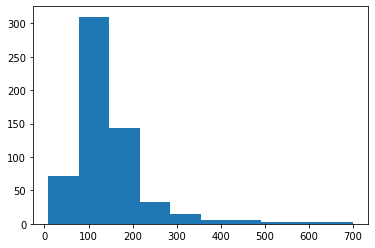

In [15]:
#visulising distribution of the loan ammount 
plt.hist(data['LoanAmount'])

#### as we can see most of the data (loan ammount  ) is left skewed . so any data with high value can affect the value very much so we will replace the missing value with the median of the data 


In [16]:
#calculating median of non null values  
median_data = data['LoanAmount'].isnull()
d1=data['LoanAmount'][median_data==False ]
print(d1.shape)
medd = median(d1)
print(medd)
data['LoanAmount']=data['LoanAmount'].fillna(medd)

(592,)
128.0


(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 512.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <a list of 10 Patch objects>)

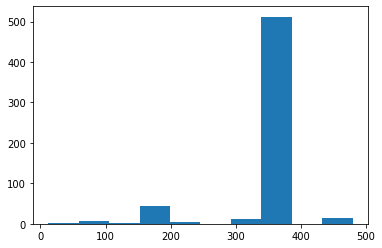

In [17]:
#Loan_Amount_Term
#visulising distribution of the Loan_Amount_Term
 
plt.hist(data['Loan_Amount_Term'])

#### as we can see most of the data points have a same term period so we can repalce the missing values with mode of the data  

In [18]:
mdd = mode(data['Loan_Amount_Term'])
print(mdd)
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(mdd)

360.0


(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 475.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

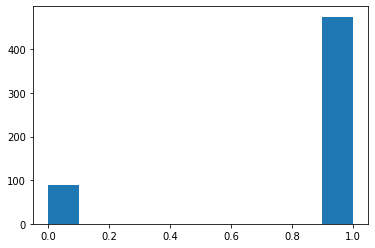

In [19]:
plt.hist(data['Credit_History'])

#### As from the above plot we can see it is a catagorial variable so we will check value count 

In [20]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

#### from the above value count we can see most of the credit history data have value equals to 1

#### so we will replace missing value with 1

In [21]:
data['Credit_History'] = data['Credit_History'].fillna(1.0)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### As from the above information we conclude that we have replaced all the null values with appropiate data using diffrent statistical technics 

### Now we will convert all the catagorial variable into numerical values

#   

## 4.2 Handling Catagorial Variables

### As we have many catagororial data like gender, married or not etc... these data cannot be used directly to over model because as a machine learning prediction model we have to dealt with numerical values so we need convert all catagorial variables into numerical values. 

In [23]:
data['Male']=pd.get_dummies(data['Gender'],drop_first='True')
#print(data['Male'])
data['IsMarried']=pd.get_dummies(data['Married'],drop_first='True')
#print(data['IsMarried'])
#print(data['Married'])
data['IsEducation']=pd.get_dummies(data['Education'],drop_first='True')
data['IsSelf_Employed']=pd.get_dummies(data['Self_Employed'],drop_first='True')
df = pd.get_dummies(data['Property_Area'],drop_first='True')
#print(df)
data['Loan_Status']=pd.get_dummies(data['Loan_Status'],drop_first='True')
data['IsSemiurban']=df['Semiurban']
data['IsUrban']=df['Urban']


#### As the Dependents is a quantative variable we can convert 0 to 0 , 1 to 1 2 to 2 and 3+ with 3

In [24]:
def get_value(X):
    y = []
    for i in range (0,614):
        if(X[i]=='0'):
            y.append(0)
        if(X[i]=='1'):
            y.append(1)
        if(X[i]=='2'):
            y.append(2)
        if(X[i]=='3+'):
            y.append(3)
    return y
        
dt = get_value(data['Dependents'])  
print(dt)
data['no_of_Dependent']=dt

[0, 1, 0, 0, 0, 2, 0, 3, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 2, 0, 3, 3, 0, 0, 1, 3, 3, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 3, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 3, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 0, 2, 3, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 3, 1, 2, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 3, 0, 3, 0, 3, 1, 0, 1, 0, 0, 0, 2, 3, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 3, 2, 0, 3, 1, 0, 0, 0, 0, 1, 0, 0, 

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    uint8  
 13  Male               614 non-null    uint8  
 14  IsMarried          614 non-null    uint8  
 15  IsEducation        614 non-null    uint8  
 16  IsSelf_Employed    614 non

In [26]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,IsMarried,IsEducation,IsSelf_Employed,IsSemiurban,IsUrban,no_of_Dependent
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,1,0,0,0,0,1,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,1,1,0,0,0,0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,1,1,0,1,0,1,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,1,1,1,0,0,1,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,1,0,0,0,0,1,0


In [27]:
data.shape

(614, 20)

### As we done with all the column and replacing all the missing values , converting catagorial variable into appropiate format we can do further analysis easily

## 4.3 Removing the unnecessary variables 

### As we have already convert Gender , Married , dependents,Education,Self_employed,property_area we can drop the following data

In [28]:
X=data.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis=1)
y=data['Loan_Status']

In [29]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,IsMarried,IsEducation,IsSelf_Employed,IsSemiurban,IsUrban,no_of_Dependent
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,1
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,0
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,0
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,0


In [30]:
X.shape

(614, 12)

## 4.4 Standard Scaler 

###  As in the given data all the the data have various range so need to convert the data into its standard scaling such that we can make uniform model and any variable can not take advantage on other variables 

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   Male               614 non-null    uint8  
 6   IsMarried          614 non-null    uint8  
 7   IsEducation        614 non-null    uint8  
 8   IsSelf_Employed    614 non-null    uint8  
 9   IsSemiurban        614 non-null    uint8  
 10  IsUrban            614 non-null    uint8  
 11  no_of_Dependent    614 non-null    int64  
dtypes: float64(4), int64(2), uint8(6)
memory usage: 32.5 KB


In [32]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,IsMarried,IsEducation,IsSelf_Employed,IsSemiurban,IsUrban,no_of_Dependent
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.817590,0.653094,0.218241,0.133550,0.379479,0.328990,0.744300
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.386497,0.476373,0.413389,0.340446,0.485653,0.470229,1.009623
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


#### from the above discription we can see that we need to scale only the Applicantincome, CoApplicantincome, Loanammount ,  Loan_amount_trm

In [33]:
# scandard scaling  fnction by x = (x-xmin)/(xmax-xmin)
def standardised_1(A):
    mi = min(A)
    ma = max(A)
    P = (A-mi)/(ma-mi)
    return P
    #print(P,A)
    #print(mi,ma)
standardised_1(data['ApplicantIncome'])

0      0.070489
1      0.054830
2      0.035250
3      0.030093
4      0.072356
         ...   
609    0.034014
610    0.048930
611    0.097984
612    0.091936
613    0.054830
Name: ApplicantIncome, Length: 614, dtype: float64

In [34]:
# scandard scaling  fnction by x = (x-xmean)/sigma
def standardised_2(A):
    me = mean(A)
    sigma = stdev(A)
    P= (A-me)/sigma
    return P


In [35]:

X['ApplicantIncome']=standardised_1(data['ApplicantIncome'])
X['CoapplicantIncome']=standardised_1(data['CoapplicantIncome'])
X['LoanAmount']=standardised_1(data['LoanAmount'])
X['Loan_Amount_Term']=standardised_1(data['Loan_Amount_Term'])
X['no_of_Dependent']=standardised_1(X['no_of_Dependent'])



In [36]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,IsMarried,IsEducation,IsSelf_Employed,IsSemiurban,IsUrban,no_of_Dependent
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905,0.706005,0.855049,0.817590,0.653094,0.218241,0.133550,0.379479,0.328990,0.248100
std,0.075560,0.070229,0.121718,0.137668,0.352339,0.386497,0.476373,0.413389,0.340446,0.485653,0.470229,0.336541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055,0.743590,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.045300,0.028524,0.172214,0.743590,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.069821,0.055134,0.225398,0.743590,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### As we convert  all the variable in range of 0 to 1 

## 5.Visulising  Data

### Now we are going to visulising the data such that we can get the relation between diffrent features of datasets and the output variable

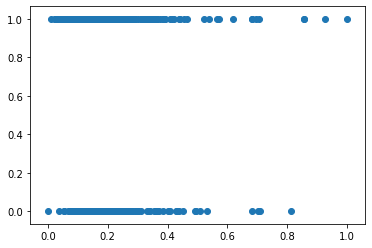

In [37]:
#visulising Loan amount 
plt.scatter(X['LoanAmount'],y) 

#### from the above plot we can see that the data have very mix behaviour both the small and big ammount data get accepted and rejected we didnt get any pattern from the above plot  

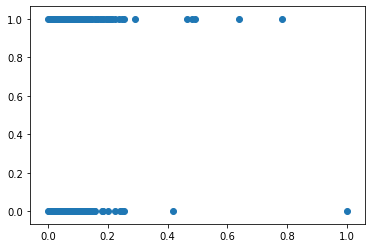

In [38]:
#visulisng Applicant Income
plt.scatter(X['ApplicantIncome'],y)

#### from the above plot we can see that the data have very mix behaviour both the small and big ammount data get accepted and rejected we didnt get any pattern from the above plot  

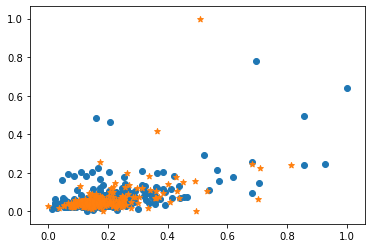

In [39]:
plt.scatter(X['LoanAmount'][y==1],X['ApplicantIncome'][y==1] )
plt.scatter(X['LoanAmount'][y==0],X['ApplicantIncome'][y==0] ,marker = '*')

#### from the above plot we can see that most of the loan ammount  is directly praposnal to their income  

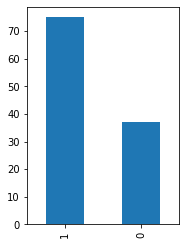

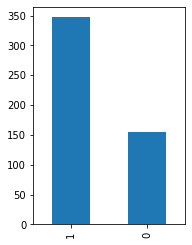

In [40]:
# visulisng the male female feature
plt.subplot(121)
y[data['Male']==0].value_counts().plot(kind='bar')
#y.value_counts()[data['Male']==0].plot(kind='bar')
plt.show()

plt.subplot(121)
y[data['Male']==1].value_counts().plot(kind='bar')
#y.value_counts()[data['Male']==0].plot(kind='bar')
plt.show()


#### both the male and female get the loan with almost equal probabiliy

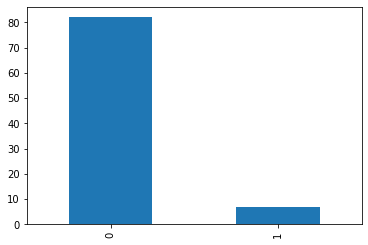

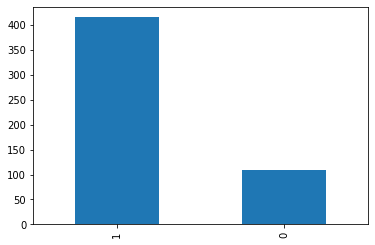

In [41]:
# visulising Credit History 
y[data['Credit_History']==0].value_counts().plot(kind='bar')
plt.show()
y[data['Credit_History']==1].value_counts().plot(kind='bar')


#### from the above two plot we can see that loan status is proposnal to the credit history most of time when the credit history is 1 then loan status is also 1 an vice versa 

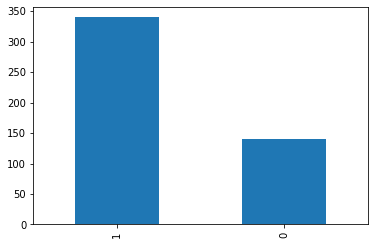

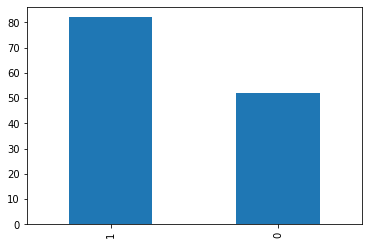

In [42]:
# visulising the Education
y[data['IsEducation']==0].value_counts().plot(kind='bar')
plt.show()
y[data['IsEducation']==1].value_counts().plot(kind='bar')


#### can not get any significant result

#### From the above data we are enable to find any specific pattern in our data so we will reduce the dimension of the dataset and try to visulise the data 

(614, 3)
(614,)


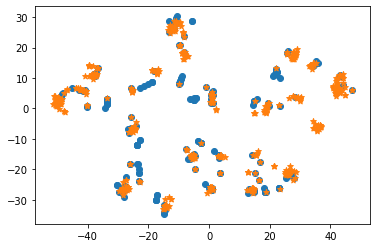

In [43]:
from sklearn.manifold import TSNE

da = X
la=y
model = TSNE(n_components=2,random_state = 0,n_iter=4000,perplexity=20.0)
tsne_data = model.fit_transform(da)  
#?? model
tsne_data = np.vstack((tsne_data.T,y)).T
tsne_df = pd.DataFrame(data=tsne_data,columns = ('dim1','dim2','lab'))
print(tsne_data.shape)
print(y.shape)

plt.scatter(tsne_df['dim1'][y==0],tsne_df['dim2'][y==0],marker='o')
plt.scatter(tsne_df['dim1'][y==1],tsne_df['dim2'][y==1],marker='*')

## 6. Spliting the data into train and test 

### As we analysis the complete data and we can built our model for building our model we need to split our data into train and test data.

In [44]:
def spliting(X,y):
    indices=np.random.permutation(len(data))
    #print(indices)
    num_of_rows =  int(614* 0.8)
    #print(num_of_rows)
    train_data = indices[:num_of_rows] #indexes rows for training data
    test_data =  indices[num_of_rows:] #indexes rows for test data
    
    
    #print(y.shape)
    X_train = X.loc[train_data,:] 
    X_test = X.loc[test_data,:]
    y_train = y.loc[train_data]
    y_test = y.loc[test_data]
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = spliting(X,y)

In [45]:
X_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,IsMarried,IsEducation,IsSelf_Employed,IsSemiurban,IsUrban,no_of_Dependent
565,0.053395,0.000000,0.160637,0.74359,1.0,1,1,1,0,0,0,0.000000
260,0.073383,0.101999,0.464544,0.74359,1.0,1,1,0,0,0,1,0.333333
317,0.023599,0.051216,0.114327,0.74359,1.0,1,1,0,0,0,1,0.000000
200,0.030303,0.060000,0.117221,0.74359,1.0,1,1,1,0,1,0,0.333333
558,0.046221,0.064055,0.221418,0.74359,1.0,1,1,0,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
538,0.034224,0.012864,0.082489,0.74359,1.0,1,1,1,0,0,0,0.000000
221,0.047730,0.041208,0.154848,0.74359,1.0,1,1,0,0,1,0,0.666667
191,0.146568,0.000000,0.224313,0.74359,1.0,1,0,0,0,1,0,0.000000
148,0.121831,0.039984,0.312590,0.74359,1.0,0,0,0,0,0,0,0.000000


In [46]:
X_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,IsMarried,IsEducation,IsSelf_Employed,IsSemiurban,IsUrban,no_of_Dependent
565,0.053395,0.000000,0.160637,0.74359,1.0,1,1,1,0,0,0,0.000000
260,0.073383,0.101999,0.464544,0.74359,1.0,1,1,0,0,0,1,0.333333
317,0.023599,0.051216,0.114327,0.74359,1.0,1,1,0,0,0,1,0.000000
200,0.030303,0.060000,0.117221,0.74359,1.0,1,1,1,0,1,0,0.333333
558,0.046221,0.064055,0.221418,0.74359,1.0,1,1,0,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
538,0.034224,0.012864,0.082489,0.74359,1.0,1,1,1,0,0,0,0.000000
221,0.047730,0.041208,0.154848,0.74359,1.0,1,1,0,0,1,0,0.666667
191,0.146568,0.000000,0.224313,0.74359,1.0,1,0,0,0,1,0,0.000000
148,0.121831,0.039984,0.312590,0.74359,1.0,0,0,0,0,0,0,0.000000


In [47]:
y_train

541    0
3      1
470    1
323    1
313    1
      ..
563    1
30     0
430    1
15     1
259    0
Name: Loan_Status, Length: 491, dtype: uint8

In [48]:
y_test

565    1
260    1
317    1
200    1
558    1
      ..
538    0
221    1
191    0
148    0
116    1
Name: Loan_Status, Length: 123, dtype: uint8

## 7. Designing the model 

### As we have split the data into train and test datasets now we built diffrent models and test their accuracy 

### diffrent Classification Algorithms 
    Linear Classifiers : 
        Logistic regression. 
        Naive Bayes classifier.
        Fisher's linear discriminant.
    Support vector machines : 
        Least squares support vector machines.
    Quadratic classifiers 
    Kernel estimation. 
    k-nearest neighbor.
    Decision trees. 
    Random forests.
    Neural networks.
    Learning vector quantization.

### we are using logistic regression to predict the output 

In [49]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)


## 8.EVAluation of the models 

In [50]:
reg.score(X_test,y_test)

0.8130081300813008

### from the above output we find the accuracy of the algorithm prediction on the given data is 0.81 

## 9.predicting the final output 

In [ ]:
# enter a data 
s = input()
t = s.split(,)

## 10. Conclusion 

### WE  can conclude that from the given data if we have some information of the user we can predict whether the person get the loan or not . Or this model can be used by the bank to predict whether the loan  should provide or not to the person  